[View in Colaboratory](https://colab.research.google.com/github/agerk/dataScience/blob/master/data_wrangling_python.ipynb)

<h2>Data Wrangling</h2>

It is the process of converting data from initial format to a format that may be better for analysis

In [0]:
import pandas as pd
import numpy as np

In [0]:
# Load the Automobile Data set from the link below
# https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data

filename = 'https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
df = pd.read_csv(filename, names = headers)
print("Done!")

In [4]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


<h3>Step 1: Identify and handle missing values</h3>

In [6]:
# Conver "?" to NaN
df.replace("?", np.nan, inplace=True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [7]:
# Evaluate for missing data
missing_data = df.isnull()    # return boolean value indicating whether the dataframe is missing data or not
missing_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
# Counting misssing values in each column of df
for col in missing_data.columns.values.tolist():
  print(col)
  print(missing_data[col].value_counts())
  print("")

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa

<h3>Step 2: Deal with missing data</h3>

1.   Drop data, either by dropping the whole row or column
   - drop the whole row
   - drop the whole column, if the entire coloumn is empty
2.    Replace data
     -  replace it by mean
     - replace it by frequency
     - replace it based on othe functions



**Replace NaN by mean for**

In [0]:
# Replace NaN by mean for
avg1 = df["normalized-losses"].astype('float').mean(axis=0)
df["normalized-losses"].replace(np.nan, avg1, inplace=True)

avg2 = df["bore"].astype('float').mean(axis=0)
df["bore"].replace(np.nan, avg2, inplace=True)

avg3 = df["stroke"].astype('float').mean(axis=0)
df["stroke"].replace(np.nan, avg3, inplace=True)

avg4 = df["horsepower"].astype('float').mean(axis=0)
df['horsepower'].replace(np.nan, avg3, inplace=True)

avg5 = df['peak-rpm'].astype('float').mean(axis=0)
df['peak-rpm'].replace(np.nan, avg4, inplace=True)

**Replace by frequency**

In [0]:
# Replace by frequency
# df["num-of-doors"].value_counts()    # find out the most frequecnt value or use idxmax()
freq = df["num-of-doors"].value_counts().idxmax()
df["num-of-doors"].replace(np.nan, freq, inplace=True)

**Drop the whole row with no price data**

In [0]:
# drop the whole row with NaN in "price" column
df.dropna(subset=["price"], axis=0, inplace=True)
# reset index, since rows were dropped
df.reset_index(drop=True, inplace=True)

<h3>Step 3: Correct data format</h3>

Numerical variables should have type `float` or `int`
- Check data format using `.dtype()`
- Change data type using `.astype()`

In [18]:
# LIst data type for each column
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

**Convert  data types to proper format**

In [19]:
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype('float')
df[["normalized-losses"]] = df[["normalized-losses"]].astype('float')
df[["price"]] = df[["price"]].astype('float')
df[["peak-rpm"]] = df[["peak-rpm"]].astype('float')
print('Done!')

Done!


In [20]:
# Check data type
df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

<h3>Step 4: Data Standardization</h3>

- its the process of transforming data into a common format 

In [21]:
# transform mpg to L/100km 
df['city-L/100km'] = 235/df['city-mpg']
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556


In [23]:
# transform highway-mpg to km
df['highway-L/100km'] = 235/df["highway-mpg"]
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476,8.703704
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476,8.703704
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421,9.038462
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667,7.833333
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556,10.681818


<h3>Data Normalization</h3>

- its the process of transforming values of several variables into a similar range.
- typical normalization include scaling the variable so the average is centered at 0, and scaling the variable to the variance is 1

In [25]:
# normalize by max value
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()
df[['length', 'width']].head()

,length,width
0,0.811148,0.890278
1,0.811148,0.890278
2,0.822681,0.909722
3,0.848630,0.919444
4,0.848630,0.922222


In [28]:
# normalize hieght
df['height'] = df['height']/df['height'].max()
df[['height']].head()

,height
0,0.816054
1,0.816054
2,0.876254
3,0.908027
4,0.908027


<h3>Binning</h3>

- its the process of transforming continous numerical variables inot discrete catagorical `bins` for grouped analysis

In [29]:
# horsepower is a real valued variable ranging from 48 to 288. 
# What if we only care about the price difference between cars with high hoirsepower, medium, and little horsepower. 

# convert data to correct format
df['horsepower'] = df['horsepower'].astype(float, copy=True)
# bin into three catagories
bin_width = (max(df['horsepower']) - min(df['horsepower']))/4
bin_width

64.68614427860696

In [30]:
# create a bin array with minimum and maximum value, with bin_width
bins = np.arange(min(df['horsepower']), max(df['horsepower']), bin_width)
bins

array([  3.25542289,  67.94156716, 132.62771144, 197.31385572])

In [31]:
# get group names
group_name = ['Low', 'Medium', 'High']

# Apply function 'cut' to determine what each value of df['horsepower'] belongs to
df['horsepower_binned'] = pd.cut(df['horsepower'], bins, labels=group_name, include_lowest=True)
df[['horsepower', 'horsepower_binned']].head(10)

,horsepower,horsepower_binned
0,111.0,Medium
1,111.0,Medium
2,154.0,High
3,102.0,Medium
4,115.0,Medium
5,110.0,Medium
6,110.0,Medium
7,110.0,Medium
8,140.0,High
9,101.0,Medium


<h3>Bins visualization</h3>

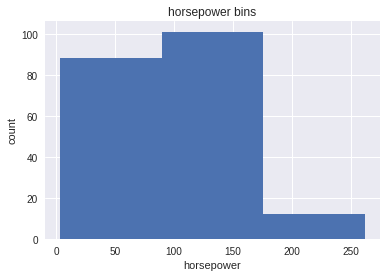

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
# from matplotlib import pyplot

a = (0, 1, 2)

# draw hist of attribute 'hoirsepower' with bins =3
plt.hist(df['horsepower'], bins=3)
# set x/y labels
plt.xlabel('horsepower')
plt.ylabel('count')
plt.title('horsepower bins')

plt.show()

<h3>Indicator variable (or dummy variable)</h3>

- its a numerical variable used to label categories. 
- they are called `dummies` because the numbers themselves don't have inherent meaning

In [40]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'city-L/100km', 'highway-L/100km',
       'horsepower_binned'],
      dtype='object')

In [41]:
# get indicator variables and assign it to a dataframe 'dummy_var_1'
dummy_var_1 = pd.get_dummies(df['fuel-type'])
dummy_var_1.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [42]:
# rename column 
dummy_var_1.rename(columns={'fuel-type-diesel':'gas', 'fuel-type-diesel':'diesel'}, inplace=True)
dummy_var_1.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [43]:
# insert back into original dataset
df = pd.concat([df, dummy_var_1], axis=1)
# drop original column 'fuel-type'
df.drop("fuel-type", axis=1, inplace=True)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower_binned,diesel,gas
0,3,122.0,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,111.0,5000.0,21,27,13495.0,11.190476,8.703704,Medium,0,1
1,3,122.0,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,111.0,5000.0,21,27,16500.0,11.190476,8.703704,Medium,0,1
2,1,122.0,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,154.0,5000.0,19,26,16500.0,12.368421,9.038462,High,0,1
3,2,164.0,audi,std,four,sedan,fwd,front,99.8,0.848630,...,102.0,5500.0,24,30,13950.0,9.791667,7.833333,Medium,0,1
4,2,164.0,audi,std,four,sedan,4wd,front,99.4,0.848630,...,115.0,5500.0,18,22,17450.0,13.055556,10.681818,Medium,0,1


In [44]:
# get indicator variables for "aspiration"
dummy_var_2 = pd.get_dummies(df['aspiration'])
dummy_var_2.head()

,std,turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [45]:
# rename column 
dummy_var_2.rename(columns={'aspiration':'std', 'aspiration':'turbo'}, inplace=True)
dummy_var_2.head()

,std,turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [46]:
# insert back into original dataset
df = pd.concat([df, dummy_var_2], axis=1)
# drop original column 'fuel-type'
df.drop("aspiration", axis=1, inplace=True)
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower_binned,diesel,gas,std,turbo
0,3,122.0,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,21,27,13495.0,11.190476,8.703704,Medium,0,1,1,0
1,3,122.0,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,21,27,16500.0,11.190476,8.703704,Medium,0,1,1,0
2,1,122.0,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,19,26,16500.0,12.368421,9.038462,High,0,1,1,0
3,2,164.0,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,24,30,13950.0,9.791667,7.833333,Medium,0,1,1,0
4,2,164.0,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,18,22,17450.0,13.055556,10.681818,Medium,0,1,1,0


In [0]:
# save dat to new file
df.to_csv('clean_df.csv')

*This notebook was inspired by IBM Applied Data Science course on Coursera*